![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [3]:
data['M_Camry'] = pd.factorize(data.M_Camry)[0]
data['M_Camry4dr'] = pd.factorize(data.M_Camry4dr)[0]
data['M_CamryBase'] = pd.factorize(data.M_CamryBase)[0]
data['M_CamryL'] = pd.factorize(data.M_CamryL)[0]
data['M_CamryLE'] = pd.factorize(data.M_CamryLE)[0]
data['M_CamrySE'] = pd.factorize(data.M_CamrySE)[0]
data['M_CamryXLE'] = pd.factorize(data.M_CamryXLE)[0]
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,0,0,0,0
11,13995,2014,39972,0,0,0,1,1,0,0
167,17941,2016,18989,0,0,0,1,0,1,0
225,12493,2014,51330,0,0,0,0,0,0,0
270,7994,2007,116065,0,1,0,1,0,0,0


In [4]:
data.describe()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
count,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000,10495.000000
mean,14538.403716,2013.553883,52509.430395,0.056313,0.158456,0.012292,0.951787,0.236494,0.376370,0.111863
std,3922.420961,3.116585,36791.736601,0.230535,0.365186,0.110189,0.214227,0.424949,0.484498,0.315213
min,5002.000000,1998.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11999.000000,2012.000000,26461.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,15000.000000,2014.000000,41680.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,16999.000000,2016.000000,71355.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,32444.000000,2018.000000,232658.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10495 entries, 7 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10495 non-null  int64
 1   Year         10495 non-null  int64
 2   Mileage      10495 non-null  int64
 3   M_Camry      10495 non-null  int64
 4   M_Camry4dr   10495 non-null  int64
 5   M_CamryBase  10495 non-null  int64
 6   M_CamryL     10495 non-null  int64
 7   M_CamryLE    10495 non-null  int64
 8   M_CamrySE    10495 non-null  int64
 9   M_CamryXLE   10495 non-null  int64
dtypes: int64(10)
memory usage: 901.9 KB


In [6]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [7]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Celda 1
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [10]:
def var(y):
    """Calcula la varianza de los valores en y."""
    return y.var() if len(y) > 0 else 0

In [11]:
def var_impurity(X_col, y, split):
    """Calcula la reducción de impureza al hacer un split en X_col."""
    filter_l = X_col < split
    y_l, y_r = y[filter_l], y[~filter_l]
    
    n_l, n_r = len(y_l), len(y_r)
    if n_l == 0 or n_r == 0:
        return 0  # Evita splits innecesarios
    
    impurity_reduction = var(y) - (n_l / (n_l + n_r) * var(y_l) + n_r / (n_l + n_r) * var(y_r))
    return impurity_reduction

In [12]:
def best_split(X, y, num_pct=10):
    """Encuentra la mejor división basada en la máxima reducción de impureza."""
    best = {'feature': None, 'split': None, 'gain': -np.inf}
    
    for j in range(X.shape[1]):
        unique_values = np.percentile(X.iloc[:, j], np.linspace(0, 100, num_pct + 2)[1:-1])
        unique_values = np.unique(unique_values)
        
        for split in unique_values:
            gain = var_impurity(X.iloc[:, j], y, split)
            if gain > best['gain']:
                best = {'feature': j, 'split': split, 'gain': gain}
    
    return best['feature'], best['split'], best['gain']

In [13]:
j, split, gain = best_split(X_train, y_train, 2)
j, split, gain

(0, np.float64(2014.0), np.float64(8772645.83591998))

In [14]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    """Construye el árbol de decisión de manera recursiva."""
    if len(y) == 1:
        return {'y_pred': y.iloc[0], 'y_prob': 0.5, 'level': level, 'split': None, 'n_samples': 1, 'gain': 0}
    
    j, split, gain = best_split(X, y, num_pct)
    
    # Condiciones de parada
    if gain < min_gain or (max_depth is not None and level >= max_depth):
        return {'y_pred': y.mean(), 'y_prob': (y.sum() + 1) / (len(y) + 2), 'level': level, 'split': None, 'n_samples': len(y), 'gain': gain}
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l, X_r, y_r = X[filter_l], y[filter_l], X[~filter_l], y[~filter_l]
    
    return {
        'y_pred': y.mean(),
        'y_prob': (y.sum() + 1) / (len(y) + 2),
        'level': level,
        'split': (j, split),
        'n_samples': len(y),
        'gain': gain,
        'sl': tree_grow(X_l, y_l, level + 1, min_gain, max_depth, num_pct),
        'sr': tree_grow(X_r, y_r, level + 1, min_gain, max_depth, num_pct)
    }

In [15]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': np.float64(14527.187882235812),
 'y_prob': np.float64(14523.0568747334),
 'level': 0,
 'split': (0, np.float64(2014.0)),
 'n_samples': 7031,
 'gain': np.float64(8772645.83591998),
 'sl': {'y_pred': np.float64(10222.385568835769),
  'y_prob': np.float64(10213.343653250775),
  'level': 1,
  'split': (0, np.float64(2012.0)),
  'n_samples': 2259,
  'gain': np.float64(3917591.051603822),
  'sl': {'y_pred': np.float64(8765.206825938567),
   'y_prob': np.float64(8753.257668711656),
   'level': 2,
   'split': (0, np.float64(2010.0)),
   'n_samples': 1465,
   'gain': np.float64(1115395.187766428),
   'sl': {'y_pred': np.float64(7923.032366071428),
    'y_prob': np.float64(7905.387527839644),
    'level': 3,
    'split': None,
    'n_samples': 896,
    'gain': np.float64(688101.0385855744)},
   'sr': {'y_pred': np.float64(10091.37258347979),
    'y_prob': np.float64(10056.028021015762),
    'level': 3,
    'split': None,
    'n_samples': 569,
    'gain': np.float64(899911.1494704406)}

In [16]:
def tree_predict(X, tree, proba=False):
    """Predice valores para X usando el árbol de decisión."""
    predictions = np.empty(X.shape[0])
    
    for i in range(len(X)):
        node = tree
        while node['split'] is not None:
            feature, split = node['split']
            node = node['sl'] if X.iloc[i, feature] < split else node['sr']
        predictions[i] = node['y_prob'] if proba else node['y_pred']
    
    return predictions

In [17]:
# Ejecución de función tree_predict
yPredict_Tree = tree_predict(X_test, tree)

In [18]:
MSETREE = np.average(np.square(yPredict_Tree-y_test))
r2Tree = r2_score(y_test, yPredict_Tree)

# Mostramos los resultados
print(f'MSE: {MSETREE:.2f}')
print(f'RMSE: {np.sqrt(MSETREE):.2f}')
print(f"R² Score: {r2Tree:.3f}")

MSE: 3595738.59
RMSE: 1896.24
R² Score: 0.760


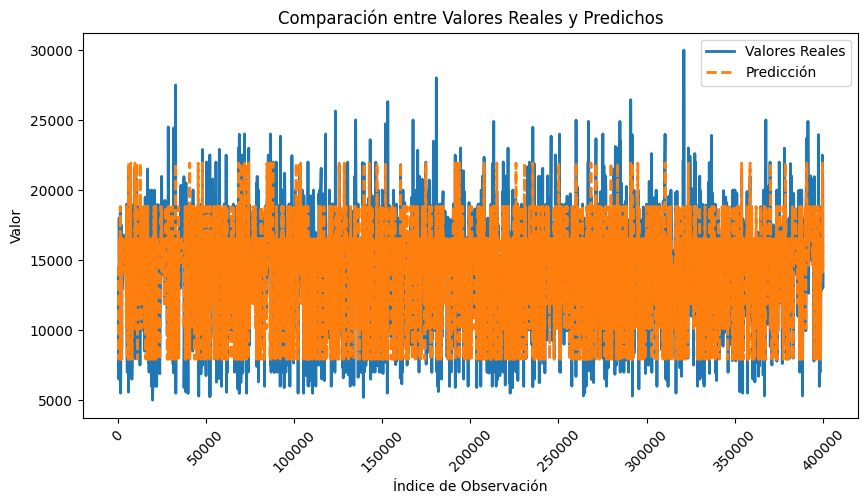

In [19]:
graf = pd.DataFrame({"real": y_test, "predicho": yPredict_Tree})

plt.figure(figsize=(10, 5))
sns.lineplot(data=graf, x=graf.index, y="real", label="Valores Reales", linewidth=2)
sns.lineplot(data=graf, x=graf.index, y="predicho", label="Predicción", linestyle="dashed", linewidth=2)

plt.xticks(rotation=45)  # Mejora la legibilidad del eje x si es una fecha/hora
plt.xlabel("Índice de Observación")
plt.ylabel("Valor")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

In [20]:
def mse_def(y):
    return ((y - y.mean())**2).mean() if len(y) > 0 else 0

In [21]:
def mse_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l, y_r = y[filter_l], y[~filter_l]
    
    n_l, n_r = y_l.shape[0], y_r.shape[0]
    if n_l == 0 or n_r == 0:
        return 0  # Evita splits innecesarios
    
    mse_y = mse_def(y)
    mse_l = mse_def(y_l)
    mse_r = mse_def(y_r)
    
    mse_impurity_ = mse_y - (n_l / (n_l + n_r) * mse_l + n_r / (n_l + n_r) * mse_r)
    
    return mse_impurity_


In [22]:
def best_split(X, y, num_pct=10):
    """Encuentra la mejor división basada en la reducción de MSE."""
    features = range(X.shape[1])
    best_split = [0, 0, 0]  # j, split, gain
    
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.linspace(0, 100, num_pct + 2)[1:-1])
        splits = np.unique(splits)
        
        for split in splits:
            gain = mse_impurity(X.iloc[:, j], y, split)
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [23]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    if X.shape[0] == 1:
        return dict(y_pred=y.mean(), level=level, split=None, n_samples=1, gain=0)
    
    # Obtener mejor split
    j, split, gain = best_split(X, y, num_pct)

    # Definir valores de predicción
    y_pred = y.mean()
    
    # Construir nodo
    tree = dict(y_pred=y_pred, level=level, split=None, n_samples=X.shape[0], gain=gain)

    # Criterios de parada
    if gain < min_gain or (max_depth is not None and level >= max_depth):
        return tree

    # Si hay una buena división, actualizar el nodo y continuar con hijos
    tree['split'] = [j, split]
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain, max_depth, num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain, max_depth, num_pct)

    return tree


In [24]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': np.float64(14527.187882235812),
 'level': 0,
 'split': [0, np.float64(2014.0)],
 'n_samples': 7031,
 'gain': np.float64(8772476.647294518),
 'sl': {'y_pred': np.float64(10222.385568835769),
  'level': 1,
  'split': [0, np.float64(2012.0)],
  'n_samples': 2259,
  'gain': np.float64(3917804.643603149),
  'sl': {'y_pred': np.float64(8765.206825938567),
   'level': 2,
   'split': [0, np.float64(2010.0)],
   'n_samples': 1465,
   'gain': np.float64(1116862.9305515732),
   'sl': {'y_pred': np.float64(7923.032366071428),
    'level': 3,
    'split': None,
    'n_samples': 896,
    'gain': np.float64(690447.555451347)},
   'sr': {'y_pred': np.float64(10091.37258347979),
    'level': 3,
    'split': None,
    'n_samples': 569,
    'gain': np.float64(902715.0324459565)}},
  'sr': {'y_pred': np.float64(12911.008816120906),
   'level': 2,
   'split': [1, np.float64(65336.9090909091)],
   'n_samples': 794,
   'gain': np.float64(1263752.6859777318),
   'sl': {'y_pred': np.float64(14142.18

In [25]:
def tree_predict(X, tree):
    predicted = np.ones(X.shape[0])

    # Si el nodo es terminal, devolver la predicción media almacenada
    if 'split' not in tree or tree['split'] == -1 or tree['split'] is None:
        return np.full(X.shape[0], tree['y_pred'])  # Devuelve la predicción promedio del nodo
    
    # De lo contrario, continuar dividiendo
    j, split = tree['split']
    filter_l = X.iloc[:, j] < split
    X_l = X.loc[filter_l]
    X_r = X.loc[~filter_l]

    if X_l.shape[0] > 0:
        predicted[filter_l] = tree_predict(X_l, tree['sl'])
    if X_r.shape[0] > 0:
        predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted



In [26]:
# Ejecución de función tree_predict
yPredict_Tree = tree_predict(X_test, tree)

In [27]:
MSETREE = np.average(np.square(yPredict_Tree-y_test))
r2Tree = r2_score(y_test, yPredict_Tree)

# Mostramos los resultados
print(f'MSE: {MSETREE:.2f}')
print(f'RMSE: {np.sqrt(MSETREE):.2f}')
print(f"R² Score: {r2Tree:.3f}")

MSE: 3595738.59
RMSE: 1896.24
R² Score: 0.760


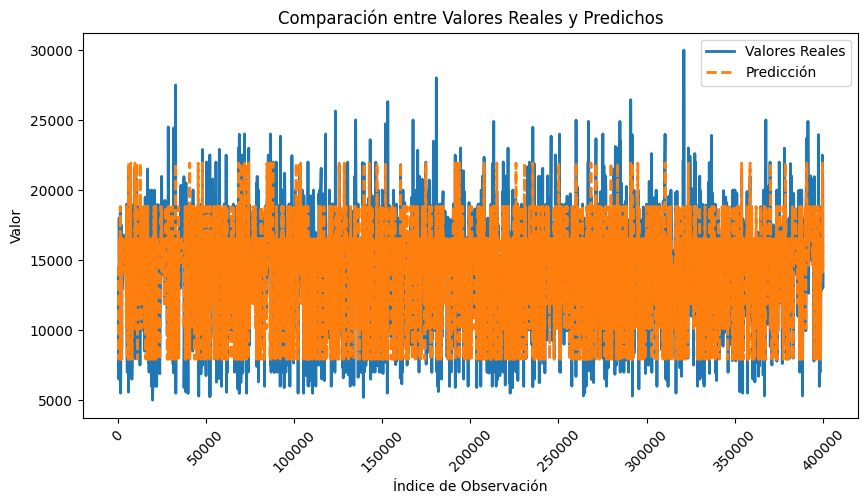

In [28]:
graf = pd.DataFrame({"real": y_test, "predicho": yPredict_Tree})

plt.figure(figsize=(10, 5))
sns.lineplot(data=graf, x=graf.index, y="real", label="Valores Reales", linewidth=2)
sns.lineplot(data=graf, x=graf.index, y="predicho", label="Predicción", linestyle="dashed", linewidth=2)

plt.xticks(rotation=45)  # Mejora la legibilidad del eje x si es una fecha/hora
plt.xlabel("Índice de Observación")
plt.ylabel("Valor")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

In [29]:
from sklearn.model_selection import KFold

def evaluate_tree_cv(X, y, k=5, max_depth=None, min_gain=0.001, num_pct=10, random_state=0):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)

    mse_scores = []
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        tree = tree_grow(X_train, y_train, max_depth=max_depth, min_gain=min_gain, num_pct=num_pct)
        y_pred = tree_predict(X_test, tree)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    results = {
        "MSE": np.mean(mse_scores),
        "RMSE": np.mean(rmse_scores),
        "MAE": np.mean(mae_scores),
        "R2": np.mean(r2_scores)
    }

    return results


In [30]:
results = evaluate_tree_cv(X, y, k=5, max_depth=5, min_gain=0.001, num_pct=10, random_state=0)
print("Evaluación promedio con validación cruzada:")
for metric, score in results.items():
    print(f"{metric}: {score:.3f}")


Evaluación promedio con validación cruzada:
MSE: 2818182.488
RMSE: 1678.532
MAE: 1244.951
R2: 0.817


In [31]:
# Inicializar lista para guardar métricas
mse_list, rmse_list, mae_list, r2_list = [], [], [], []

# Definir el número de folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop manual por cada fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar tu árbol de regresión manual
    tree = tree_grow(X_train, y_train, max_depth=5, min_gain=0.001, num_pct=10)
    
    # Predicción
    y_pred = tree_predict(X_test, tree)

    # Métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f"\nFold {fold + 1}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R2:   {r2:.4f}")

# Mostrar promedio final
print("\n--- Resultados promedio ---")
print(f"MSE promedio:  {np.mean(mse_list):.4f}")
print(f"RMSE promedio: {np.mean(rmse_list):.4f}")
print(f"MAE promedio:  {np.mean(mae_list):.4f}")
print(f"R2 promedio:   {np.mean(r2_list):.4f}")



Fold 1
MSE:  2885043.1241
RMSE: 1698.5415
MAE:  1235.0360
R2:   0.8111

Fold 2
MSE:  2707237.7084
RMSE: 1645.3686
MAE:  1240.6979
R2:   0.8182

Fold 3
MSE:  2956204.4318
RMSE: 1719.3616
MAE:  1270.4189
R2:   0.8083

Fold 4
MSE:  2763225.8051
RMSE: 1662.2953
MAE:  1236.7852
R2:   0.8200

Fold 5
MSE:  2779201.3723
RMSE: 1667.0937
MAE:  1241.8181
R2:   0.8259

--- Resultados promedio ---
MSE promedio:  2818182.4883
RMSE promedio: 1678.5321
MAE promedio:  1244.9512
R2 promedio:   0.8167


In [32]:
modelos = []
MSE = []
RMSE = []
MAE = []
R2 = []
# Guardar resultados en listas
modelos.append("Manual Tree")
MSE.append(np.mean(mse_list))
RMSE.append(np.mean(rmse_list))
MAE.append(np.mean(mae_list))
R2.append(np.mean(r2_list))

In [33]:
# Reestablecer datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de regresión y comenten sobre el desempeño del modelo.

In [34]:
# Celda 2


### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de regresión y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [35]:
# Celda 3


### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para regresión  y comenten sobre el desempeño del modelo.

In [36]:
# Celda 4


### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [37]:
# Celda 5


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de regresión con la librería sklearn y comenten sobre el desempeño del modelo.

In [38]:
# Celda 6


### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para regresión, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [39]:
# Celda 7


### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [40]:
# Celda 8


